<a href="https://colab.research.google.com/github/bacdao/LAML/blob/main/Figure3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**0.0.Install packages**

In [ ]:
install.packages(c("ggrepel", "readxl", "ggpubr", "viridis", "dplyr", "gghalves"))

In [ ]:
library(ggplot2)
library(data.table)
library(ggrepel)
library(readxl)
library(ggpubr)
library(viridis)
library(dplyr)
library(gghalves)

#**0.1.Loading data**

####0.1.1.DEGs file from cbioportal

In [4]:
deg <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/deg.tsv", sep = "\t", header = T)
head(deg)

Gene,Cytoband,(A) FLT3 mutation,(B) FLT3 non mutation,(A) FLT3 mutation,(B) FLT3 non mutation,Log Ratio,p-Value,q-Value,Higher expression in
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SDC1,2p24.1,0.59,1.49,0.40,1.05,-0.90,8.72e-14,1.70e-09,(B) FLT3 non mutation
LGALS3BP,17q25,6.21,4.08,1.38,2.07,2.14,1.43e-12,1.39e-08,(A) FLT3 mutation
AMPD1,1p13.2,0.21,0.75,0.26,0.69,-0.54,4.33e-12,2.81e-08,(B) FLT3 non mutation
ADAM6,14q32.33,3.97,5.50,1.09,1.64,-1.53,6.67e-11,2.28e-07,(B) FLT3 non mutation
HID1,17q25.1,0.32,0.81,0.27,0.65,-0.48,7.97e-11,2.28e-07,(B) FLT3 non mutation
SCNN1B,16p12.2-p12.1,0.08,0.28,0.09,0.28,-0.20,8.83e-11,2.28e-07,(B) FLT3 non mutation


In [5]:
deg_filter <- data.frame(deg$Gene,deg$`Log Ratio`,deg$`q-Value`)
colnames(deg_filter) <- c("gene","Log2FC","qvalue")

####0.1.1.DMPs file being obtained from DMP calling

In [6]:
DMP <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/DMP.tsv", header = T)
head(DMP)

logFC,AveExpr,t,P.Value,adj.P.Val,B,C_AVG,T_AVG,deltaBeta,CHR,⋯,feature,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10,probeID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>
-0.2327954,0.6146601,-8.125071,8.419218e-14,2.017955e-08,20.01816,0.6792507,0.4464554,-0.2327954,6,⋯,5'UTR,opensea,5'UTR-opensea,,NA,TRUE,,rs35278640,,cg12232118
-0.2372033,0.8340115,-8.091791,1.026281e-13,2.017955e-08,19.82215,0.8998251,0.6626218,-0.2372033,19,⋯,Body,island,Body-island,chr19:13135317-13136169,NA,NA,,,,cg26767614
-0.2238275,0.7618051,-7.973394,2.070067e-13,2.713554e-08,19.12774,0.8239075,0.6000800,-0.2238275,X,⋯,Body,shelf,Body-shelf,chrX:152612775-152613464,NA,NA,,,,cg15317375
-0.2351467,0.6787110,-7.882125,3.544572e-13,3.484810e-08,18.59565,0.7439540,0.5088074,-0.2351467,2,⋯,IGR,opensea,IGR-opensea,,TRUE,TRUE,,,,cg04849850
-0.2608458,0.7607761,-7.749485,7.707205e-13,6.061809e-08,17.82753,0.8331494,0.5723037,-0.2608458,3,⋯,5'UTR,opensea,5'UTR-opensea,,NA,NA,,,,cg13458803
-0.1868203,0.8135271,-7.672868,1.203854e-12,7.788728e-08,17.38669,0.8653616,0.6785413,-0.1868203,6,⋯,1stExon,opensea,1stExon-opensea,,NA,TRUE,,rs35278640,,cg27583815


####0.1.2.Labeling the 173 samples into 2 group 'FLT3 Mutant' and 'FLT3 wildtype'

In [29]:
designTSV <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/design.tsv", sep="\t", header=T)
designTSV$Title <- substring(designTSV$Title, 1, 12)
head(designTSV)

Title,Group
<chr>,<chr>
TCGA-AB-2803,FLT3 Wild_type
TCGA-AB-2805,FLT3 Wild_type
TCGA-AB-2806,FLT3 Wild_type
TCGA-AB-2807,FLT3 Wild_type
TCGA-AB-2808,FLT3 Wild_type
TCGA-AB-2810,FLT3 Wild_type


####0.1.3. Counting RNA-seq file using RPKM





In [19]:
rna <- fread("https://raw.githubusercontent.com/bacdao/LAML/main/data/rna_rpkm.txt", header=T)
head(rna)

Hybridization REF,TCGA-AB-2803-03A-01T-0734-13,TCGA-AB-2803-03A-01T-0734-13.1,TCGA-AB-2803-03A-01T-0734-13.2,TCGA-AB-2805-03A-01T-0734-13,TCGA-AB-2805-03A-01T-0734-13.1,TCGA-AB-2805-03A-01T-0734-13.2,TCGA-AB-2806-03A-01T-0734-13,TCGA-AB-2806-03A-01T-0734-13.1,TCGA-AB-2806-03A-01T-0734-13.2,⋯,TCGA-AB-3008-03A-01T-0736-13,TCGA-AB-3009-03A-01T-0736-13,TCGA-AB-3009-03A-01T-0736-13.1,TCGA-AB-3009-03A-01T-0736-13.2,TCGA-AB-3011-03A-01T-0736-13,TCGA-AB-3011-03A-01T-0736-13.1,TCGA-AB-3011-03A-01T-0736-13.2,TCGA-AB-3012-03A-01T-0736-13,TCGA-AB-3012-03A-01T-0736-13.1,TCGA-AB-3012-03A-01T-0736-13.2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
gene,raw_counts,median_length_normalized,RPKM,raw_counts,median_length_normalized,RPKM,raw_counts,median_length_normalized,RPKM,⋯,RPKM,raw_counts,median_length_normalized,RPKM,raw_counts,median_length_normalized,RPKM,raw_counts,median_length_normalized,RPKM
?|100134860_calculated,339,25.2169,13.0095,194,14.3952,5.9074,497,36.9257,13.6437,⋯,17.5582,230,17.1040,9.0397,293,21.7429,14.0645,348,25.8796,12.1693
?|127550_calculated,30,1.4702,0.7585,14,0.7067,0.2900,9,0.4399,0.1625,⋯,0.1827,10,0.4809,0.2542,44,2.1496,1.3905,32,1.5679,0.7373
?|339457_calculated,5,0.0980,0.0505,0,0.0000,0.0000,0,0.0000,0.0000,⋯,0.0000,0,0.0000,0.0000,0,0.0000,0.0000,13,0.2409,0.1133
?|441931_calculated,0,0.0000,0.0000,0,0.0000,0.0000,2,0.1276,0.0471,⋯,0.0000,7,0.5582,0.2950,0,0.0000,0.0000,0,0.0000,0.0000
?|64163_calculated,434,13.1215,6.7694,1549,46.7837,19.1987,2155,65.1124,24.0584,⋯,15.4672,1547,46.7432,24.7045,1088,32.8713,21.2629,1355,40.9480,19.2549


In [22]:
colnames(rna) <- gsub("Hybridization REF","geneID",colnames(rna))
colnames(rna) <- substring(names(rna),1,15) #Match the sample ID from RNA-seq to designTSV
rna$geneID <- gsub("[|].*","",rna$geneID)

In [24]:
#Only keep the RPKM
rna <- as.data.frame(rna)
cols <- (rna[1,] %in% "RPKM")
rna1 <- as.data.frame(rna[,cols])
rna1 <- as.data.frame(sapply(rna1[-1,],as.numeric)) #Remove first row with label "RPKM"

In [26]:
rna1$geneID = rna[-1,]$geneID
colnames(rna1) <- substring(colnames(rna1),1,12)

In [27]:
head(rna1)

,TCGA-AB-2803,TCGA-AB-2805,TCGA-AB-2806,TCGA-AB-2807,TCGA-AB-2808,TCGA-AB-2810,TCGA-AB-2811,TCGA-AB-2812,TCGA-AB-2813,TCGA-AB-2814,⋯,TCGA-AB-3001,TCGA-AB-3002,TCGA-AB-3005,TCGA-AB-3006,TCGA-AB-3007,TCGA-AB-3008,TCGA-AB-3009,TCGA-AB-3011,TCGA-AB-3012,geneID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,13.0095,5.9074,13.6437,15.0336,8.4875,12.3562,19.7381,5.2922,6.4513,17.9647,⋯,11.4279,21.6918,9.8702,13.1448,13.0169,17.5582,9.0397,14.0645,12.1693,?
2,0.7585,0.2900,0.1625,0.3045,0.3474,0.8070,0.2382,0.4988,0.5855,0.2175,⋯,0.7050,0.4668,0.0743,0.3311,0.3545,0.1827,0.2542,1.3905,0.7373,?
3,0.0505,0.0000,0.0000,0.0096,0.0000,0.0197,0.0256,0.0475,0.0161,0.0000,⋯,0.2404,0.0213,0.1150,0.2051,0.3157,0.0000,0.0000,0.0000,0.1133,?
4,0.0000,0.0000,0.0471,0.0000,0.0062,0.0000,0.0702,0.0417,0.0000,0.0000,⋯,0.0781,0.0638,0.0000,0.0000,0.0694,0.0000,0.2950,0.0000,0.0000,?
5,6.7694,19.1987,24.0584,26.3761,21.6881,24.3414,18.0437,40.6401,15.3399,21.4808,⋯,17.5488,29.7834,17.0727,21.9033,22.7343,15.4672,24.7045,21.2629,19.2549,?
6,0.8215,0.0436,0.4315,1.2339,0.1060,0.2919,0.8543,0.1111,0.0000,0.6135,⋯,0.1040,0.5646,0.3259,0.3401,0.5083,0.4682,0.2233,0.5466,0.2496,?


####0.1.4. Beta value file of significant DMPs





In [37]:
bVals <- read.table("https://raw.githubusercontent.com/bacdao/LAML/main/data/dmp.bval.tsv", header = T)
head(bVals)

,TCGA.AB.2802.03A.01D.0741.05,TCGA.AB.2803.03A.01D.0741.05,TCGA.AB.2804.03A.01D.0741.05,TCGA.AB.2805.03A.01D.0741.05,TCGA.AB.2806.03A.01D.0741.05,TCGA.AB.2807.03A.01D.0741.05,TCGA.AB.2808.03A.01D.0741.05,TCGA.AB.2809.03A.01D.0741.05,TCGA.AB.2810.03A.01D.0741.05,TCGA.AB.2811.03A.01D.0741.05,⋯,TCGA.AB.3001.03A.01D.0741.05,TCGA.AB.3002.03A.01D.0742.05,TCGA.AB.3005.03A.01D.0741.05,TCGA.AB.3006.03A.01D.0741.05,TCGA.AB.3007.03A.01D.0741.05,TCGA.AB.3008.03A.01D.0741.05,TCGA.AB.3009.03A.01D.0741.05,TCGA.AB.3011.03A.01D.0742.05,TCGA.AB.3012.03A.01D.0741.05,probeID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0.20258542,0.1881645,0.30188600,0.54520438,0.2771443,0.3126295,0.5251780,0.14867041,0.47703425,0.12465634,⋯,0.2582559,0.4162556,0.17595294,0.3374858,0.28956108,0.5168190,0.5666842,0.30894333,0.27418530,cg00004105
2,0.87128654,0.8797054,0.65391950,0.91022701,0.8848335,0.9084627,0.8345292,0.78559315,0.91723788,0.73987453,⋯,0.8124005,0.8812568,0.86616988,0.8335706,0.86051258,0.8772689,0.9290041,0.80065140,0.84424910,cg00005112
3,0.06995167,0.3586375,0.09896956,0.07958365,0.1960452,0.3516967,0.3602499,0.06636237,0.09627036,0.16211432,⋯,0.3065395,0.1168500,0.07486682,0.3606512,0.05118334,0.4326400,0.8477550,0.14423513,0.08601827,cg00008488
4,0.63022637,0.8290350,0.80836976,0.58272420,0.2261923,0.4546039,0.3240115,0.19800331,0.96747660,0.10409372,⋯,0.6727035,0.8979698,0.53250173,0.3744537,0.81733655,0.5079594,0.5261353,0.33187905,0.79642962,cg00010078
5,0.43592016,0.5122458,0.23885733,0.46245068,0.2610428,0.7620144,0.2450230,0.30369975,0.94468122,0.03683036,⋯,0.6218875,0.9623299,0.15892877,0.2839188,0.82158893,0.5322712,0.7604562,0.09565031,0.62832639,cg00011924
6,0.75246284,0.8869317,0.86394402,0.88556404,0.9008800,0.9117954,0.7018995,0.90816260,0.93059793,0.65852654,⋯,0.8791707,0.8870081,0.62982586,0.9119414,0.77372892,0.8966908,0.9089616,0.90901246,0.91128007,cg00019997


In [38]:
colnames(bVals) <- substring(colnames(bVals),1,12)
#Keep samples with ID matching with designTSV file above
colnames(bVals) <- gsub("[.]","-",colnames(bVals))
bVals1 <- subset(bVals, select=c("probeID",designTSV$Title))

####Merge DMP and DEG with adjusted p_value <0.05 based on gene names

In [9]:
DMP.deg <- merge(DMP,subset(deg_filter, deg_filter$qvalue<0.05), by.x="gene", by.y="gene")
head(DMP.deg)

gene,logFC,AveExpr,t,P.Value,adj.P.Val,B,C_AVG,T_AVG,deltaBeta,⋯,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10,probeID,Log2FC,qvalue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
ABCA11P,0.18386389,0.1929230,4.590632,8.504808e-06,0.002019666,1.943755,0.1419087,0.3257726,0.18386389,⋯,TSS1500-shore,chr4:467471-467839,NA,NA,,,,cg16937333,-0.55,0.005211
ABCF2,-0.09813842,0.7850417,-3.407057,8.178926e-04,0.040461162,-2.399314,0.8122709,0.7141324,-0.09813842,⋯,3'UTR-shelf,chr7:150901550-150901978,NA,NA,,rs2792441,,cg13080927,0.17,0.045100
ABI3BP,-0.14827558,0.4643640,-3.458780,6.842498e-04,0.035863699,-2.232367,0.5055040,0.3572285,-0.14827558,⋯,5'UTR-opensea,,TRUE,NA,,,,cg15028548,-0.10,0.001733
ABI3BP,-0.15209386,0.4812276,-3.442377,7.242369e-04,0.037258575,-2.285547,0.5234270,0.3713332,-0.15209386,⋯,5'UTR-opensea,,TRUE,NA,,,,cg16163419,-0.10,0.001733
ABI3BP,-0.11851663,0.2280636,-3.350950,9.902709e-04,0.045414576,-2.577924,0.2609468,0.1424302,-0.11851663,⋯,TSS200-opensea,,NA,NA,,,,cg21968765,-0.10,0.001733
ABLIM2,-0.13869887,0.6943165,-3.588829,4.330691e-04,0.026581399,-1.802981,0.7327994,0.5941005,-0.13869887,⋯,Body-opensea,,NA,NA,,,,cg00245896,-0.04,0.044500


####Extract 168 DEGs with |log2FC| >= 0.5, which correspond to the regions of DMPs

In [10]:
DMP.deg.sig <- subset(DMP.deg, abs(DMP.deg$Log2FC) >= 0.5)

In [12]:
gene <- data.frame(table(DMP.deg.sig$gene))
gene <- gene[order(-gene$Freq),]
dim(gene)

[1] 168   2

#**1.FIGURE_3**


##**1.1.Figure_3.A**

####Top 15 DEGs possessing the highest number of DMPs

In [13]:
gene1 <- gene[1:15,]
colnames(gene1) <- c("gene","freq")

topgene=merge(gene1, DMP.deg.sig, by.x="gene", by.y="gene")
topgene$rlogpvalue <- -log10(topgene$qvalue)

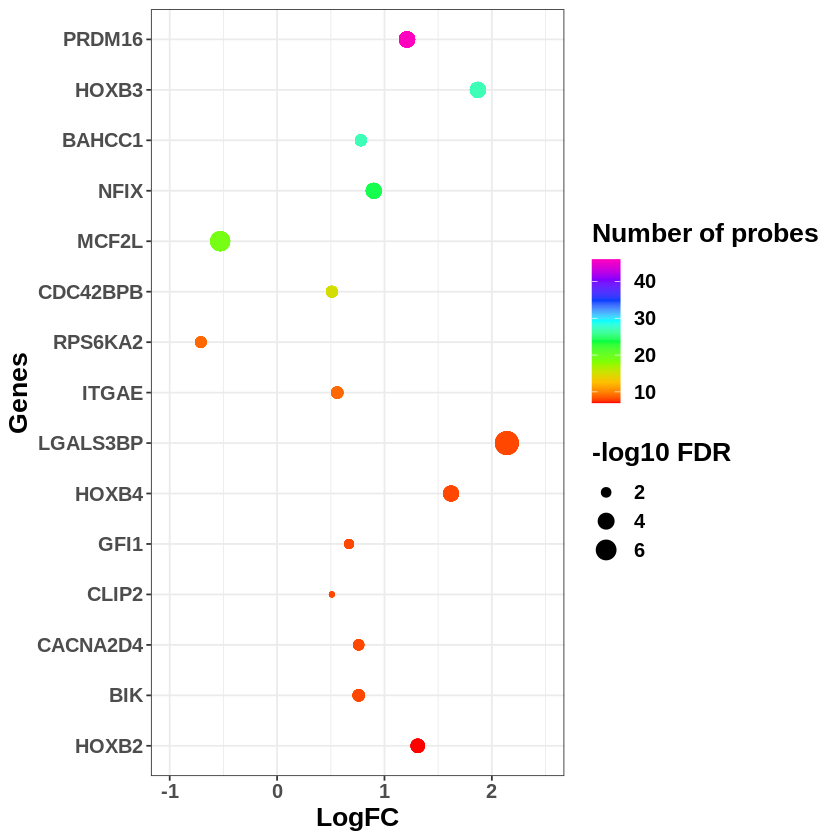

In [14]:
topgene$Exp_stat <- ifelse(topgene$Log2FC>0,"Upregulated genes","Downregulated genes")

ggplot(topgene, aes(x=Log2FC, xend=0, y=reorder(gene,freq), yend=gene, colour=freq)) + scale_color_gradientn(colours=rainbow(8)) + geom_point(aes(size=rlogpvalue)) + labs(x="LogFC", y="Genes", colour="Number of probes", size="-log10 FDR") + theme_bw() +
theme(text = element_text(size = 12, face="bold"),
  axis.text = element_text(size = 12, face = "bold"),
  axis.title = element_text(size = 16,face = "bold"), legend.title = element_text(size=16, face="bold"), legend.text = element_text(size=16, face = "bold") + scale_fill_manual(values=c("red","blue"))) + xlim(c(-1,2.5))

##**1.2.Figure_3.B**

####Scatter plot for gene expression and CpG beta values in LGALS3BP

In [30]:
#Keep RNA_seq samples with ID matching with designTSV file above
rna2 <- subset(rna1, select=c("geneID",designTSV$Title))
head(rna2)

,geneID,TCGA-AB-2803,TCGA-AB-2805,TCGA-AB-2806,TCGA-AB-2807,TCGA-AB-2808,TCGA-AB-2810,TCGA-AB-2811,TCGA-AB-2812,TCGA-AB-2813,⋯,TCGA-AB-3000,TCGA-AB-3001,TCGA-AB-3002,TCGA-AB-3005,TCGA-AB-3006,TCGA-AB-3007,TCGA-AB-3008,TCGA-AB-3009,TCGA-AB-3011,TCGA-AB-3012
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,?,13.0095,5.9074,13.6437,15.0336,8.4875,12.3562,19.7381,5.2922,6.4513,⋯,24.8946,11.4279,21.6918,9.8702,13.1448,13.0169,17.5582,9.0397,14.0645,12.1693
2,?,0.7585,0.2900,0.1625,0.3045,0.3474,0.8070,0.2382,0.4988,0.5855,⋯,0.0871,0.7050,0.4668,0.0743,0.3311,0.3545,0.1827,0.2542,1.3905,0.7373
3,?,0.0505,0.0000,0.0000,0.0096,0.0000,0.0197,0.0256,0.0475,0.0161,⋯,0.0000,0.2404,0.0213,0.1150,0.2051,0.3157,0.0000,0.0000,0.0000,0.1133
4,?,0.0000,0.0000,0.0471,0.0000,0.0062,0.0000,0.0702,0.0417,0.0000,⋯,0.0000,0.0781,0.0638,0.0000,0.0000,0.0694,0.0000,0.2950,0.0000,0.0000
5,?,6.7694,19.1987,24.0584,26.3761,21.6881,24.3414,18.0437,40.6401,15.3399,⋯,16.1145,17.5488,29.7834,17.0727,21.9033,22.7343,15.4672,24.7045,21.2629,19.2549
6,?,0.8215,0.0436,0.4315,1.2339,0.1060,0.2919,0.8543,0.1111,0.0000,⋯,0.2982,0.1040,0.5646,0.3259,0.3401,0.5083,0.4682,0.2233,0.5466,0.2496


In [39]:
bVals2 <- subset(bVals1, bVals1$probeID %in% DMP.deg.sig$probeID)
dim(bVals2)


[1] 550 174

In [42]:
bVals2 <- as.data.table(bVals2)

In [ ]:
install.packages("reshape2")
library(reshape2)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


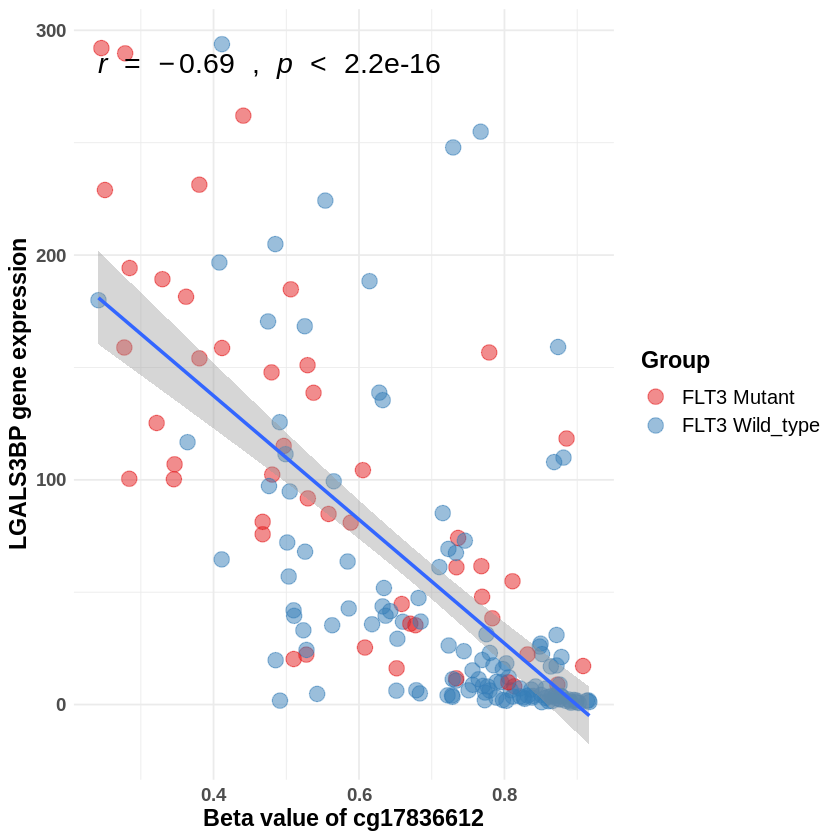

`geom_smooth()` using formula = 'y ~ x'


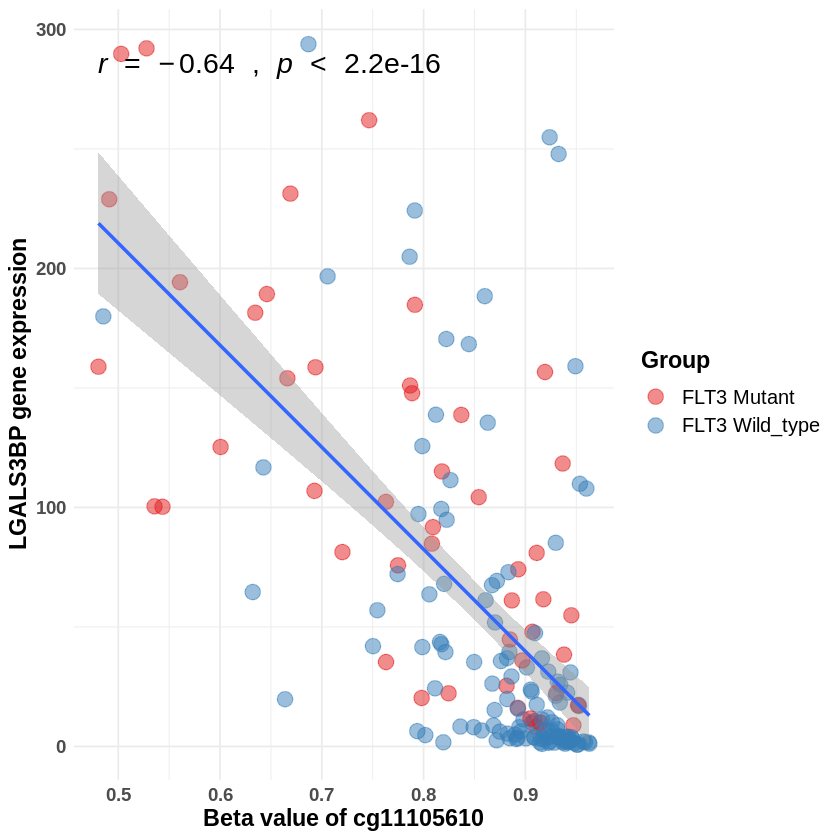

`geom_smooth()` using formula = 'y ~ x'


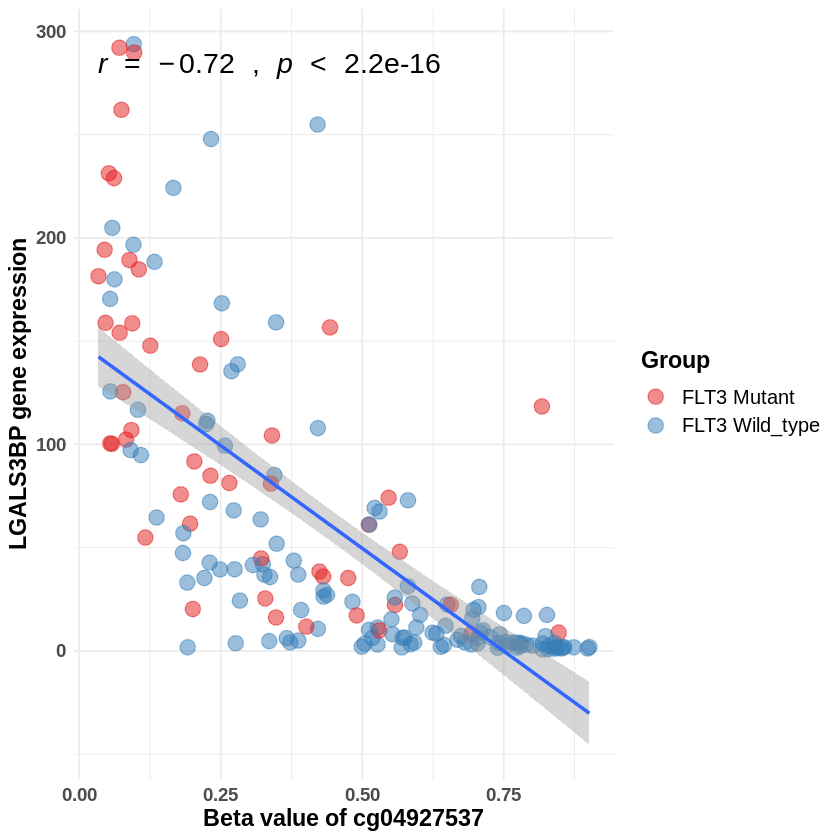

`geom_smooth()` using formula = 'y ~ x'


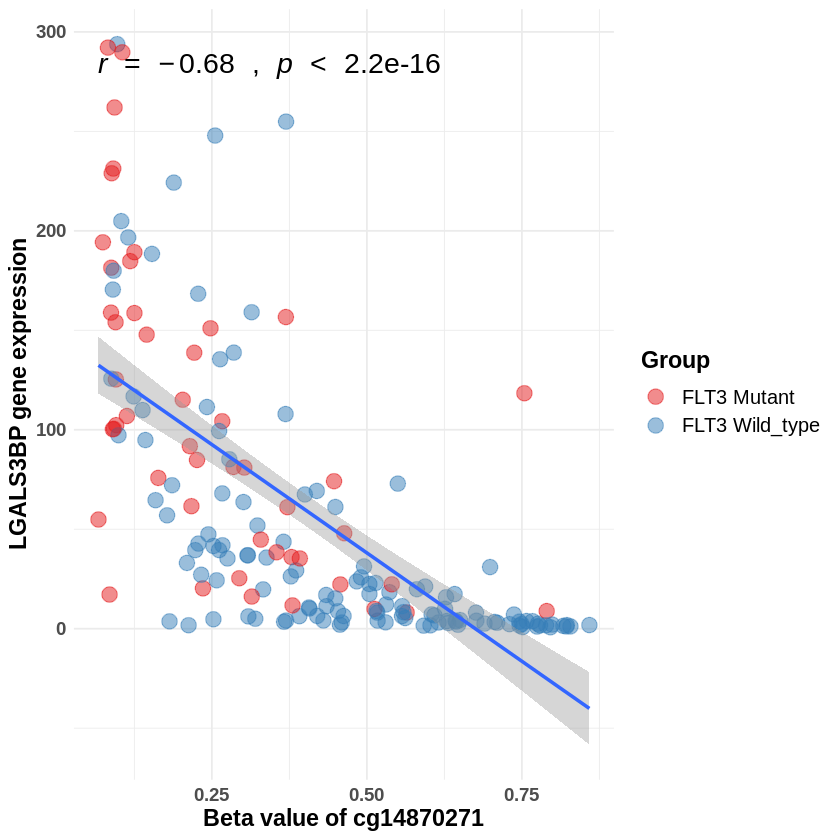

`geom_smooth()` using formula = 'y ~ x'


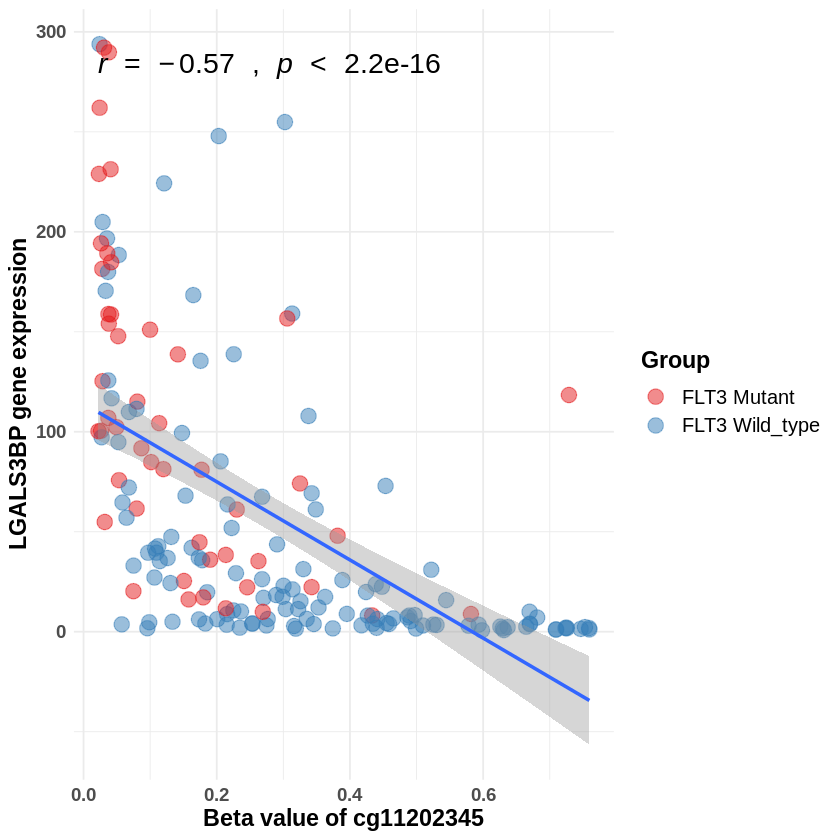

`geom_smooth()` using formula = 'y ~ x'


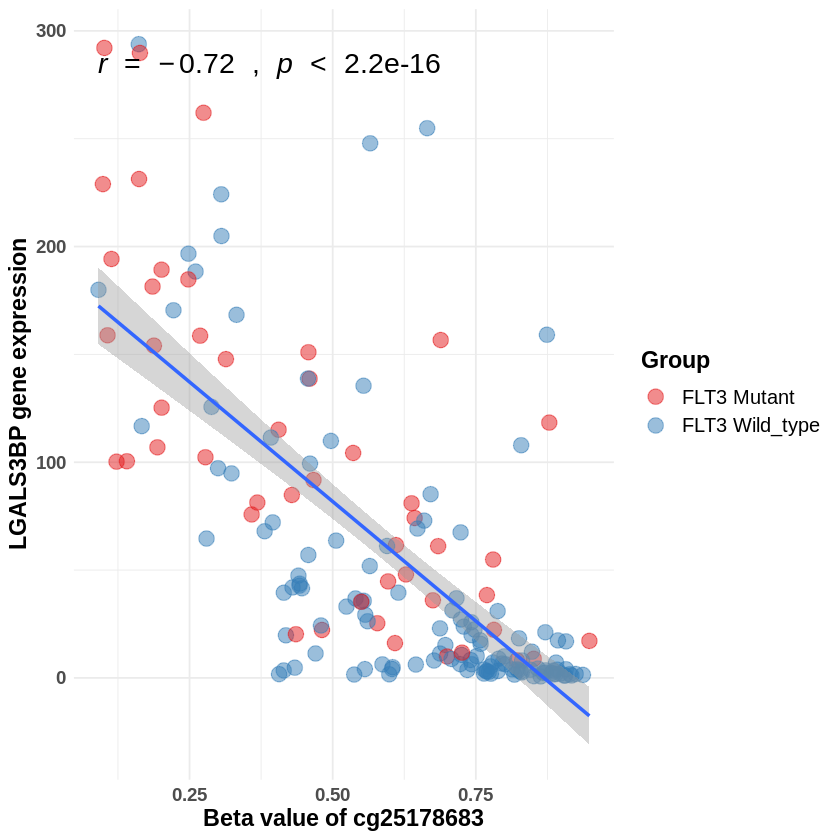

`geom_smooth()` using formula = 'y ~ x'


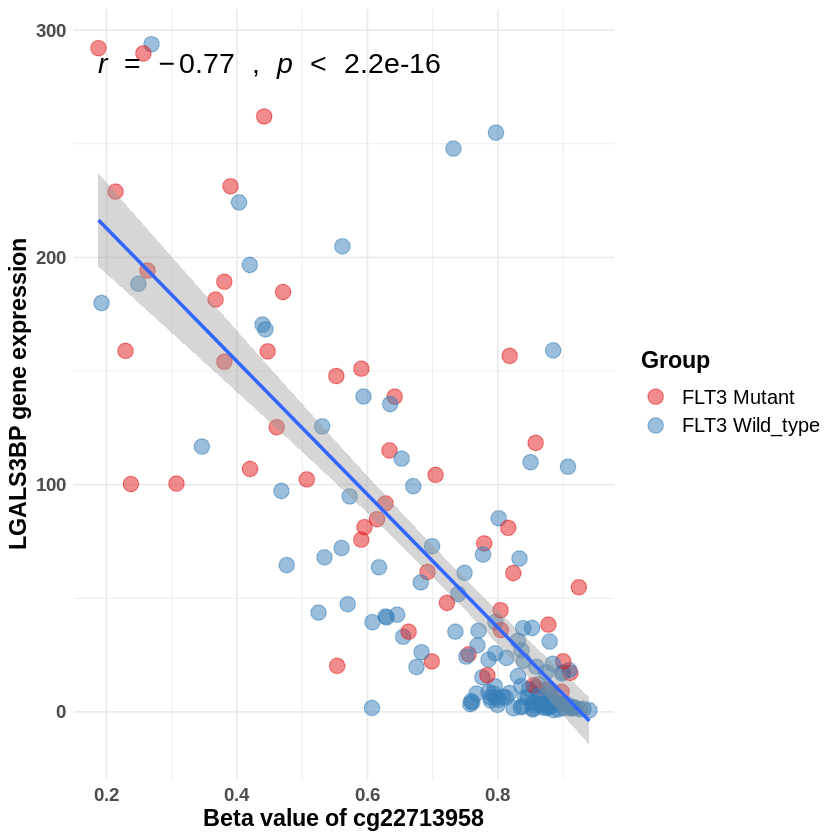

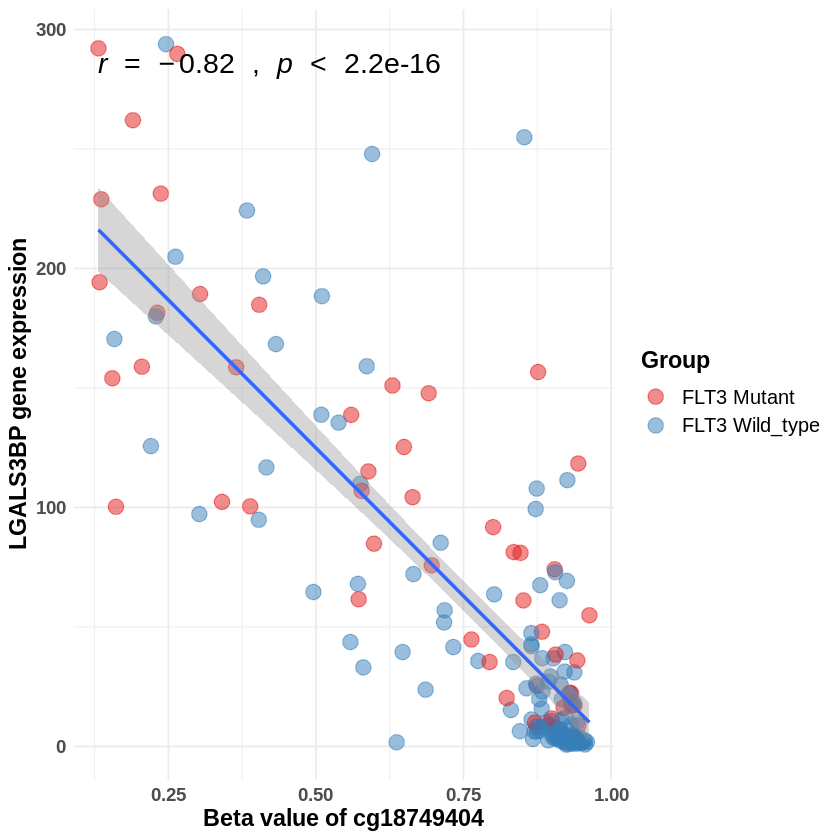

In [51]:
# Specify the gene ID
geneid <- "LGALS3BP"

# Subset RNA-seq data for the specified gene
dat <- subset(rna2, geneID %in% geneid)
dat1 <- melt(dat, id.vars = "geneID")

# Get the list of probe IDs for the gene of interest
vec1 <- subset(DMP.deg.sig, gene %in% geneid)$probeID

# Initialize a list to store ggplot objects
plot_list <- list()

# Iterate over each probe and create scatter plot with linear regression line
for (probe in vec1) {
  dat2 <- subset(bVals2, probeID %in% probe)
  dat3 <- melt(dat2, id.vars = "probeID")
  dat4 <- merge(dat1, dat3, by.x = "variable", by.y = "variable")
  data <- merge(dat4, designTSV, by.x = "variable", by.y = "Title")

  p <- ggplot(data, aes(x = value.y, y = value.x)) +
    geom_point(aes(color = Group), size = 4, alpha = 0.5) +
    labs(y = paste0(geneid, " gene expression"), x = paste0("Beta value of ", probe)) +
    theme_minimal() +
    theme(
      text = element_text(size = 14),
      legend.text = element_text(size = 12),
      legend.title = element_text(face = "bold"),
      axis.text = element_text(face = "bold"),
      axis.title = element_text(face = "bold")
    ) +
    scale_colour_brewer(palette = "Set1") +
    guides(size = FALSE) +
    geom_smooth(method = "lm") +
    stat_cor(aes(label = paste(tolower(..r.label..), ..p.label.., sep = "~`,`~")), size = 6)

  # Print the scatter plot
  print(p)
}

##**1.2.Figure_3.C**

####Scatter plot for gene expression and CpG beta values in HOXB2

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


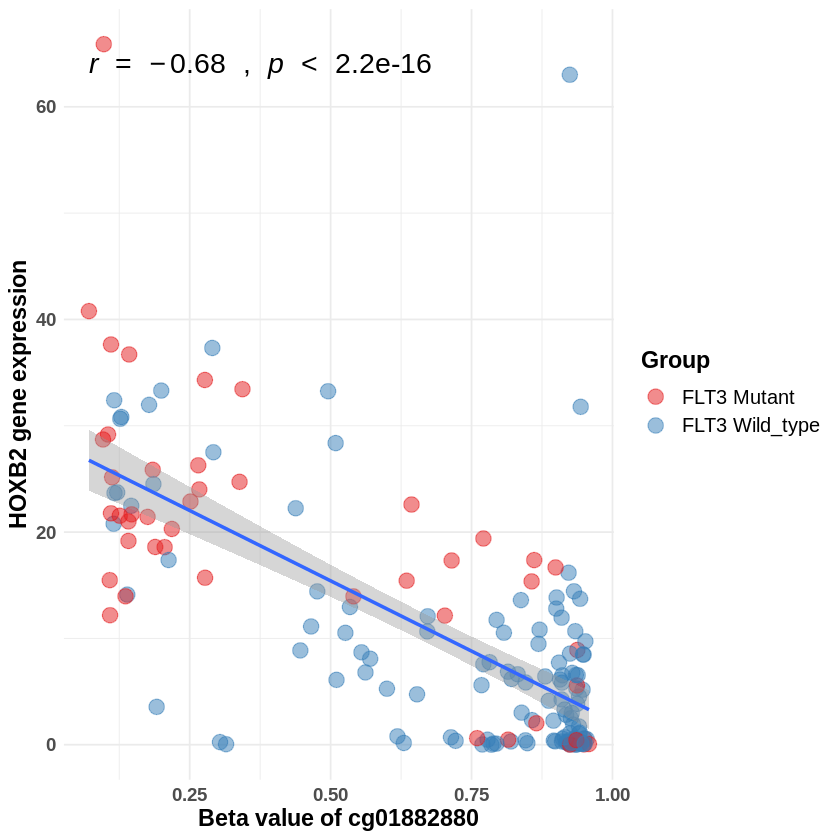

`geom_smooth()` using formula = 'y ~ x'


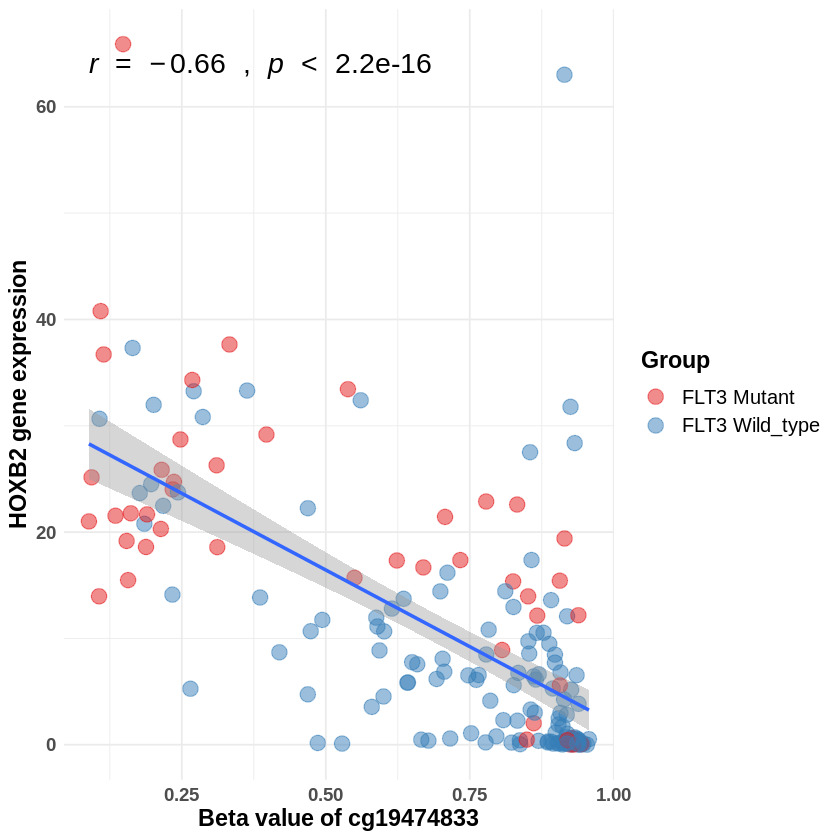

`geom_smooth()` using formula = 'y ~ x'


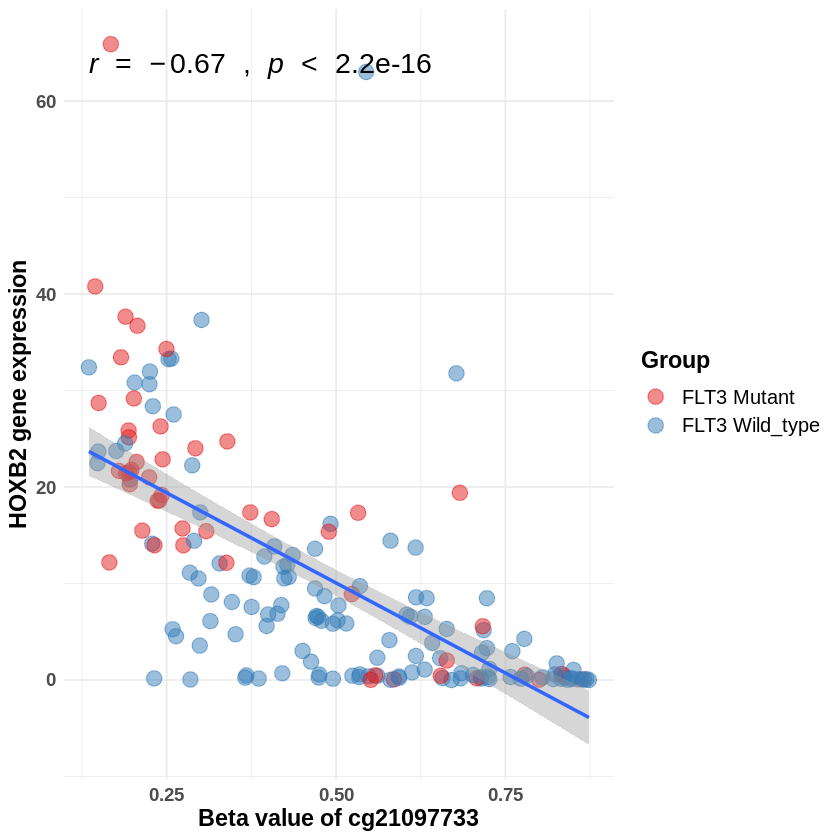

`geom_smooth()` using formula = 'y ~ x'


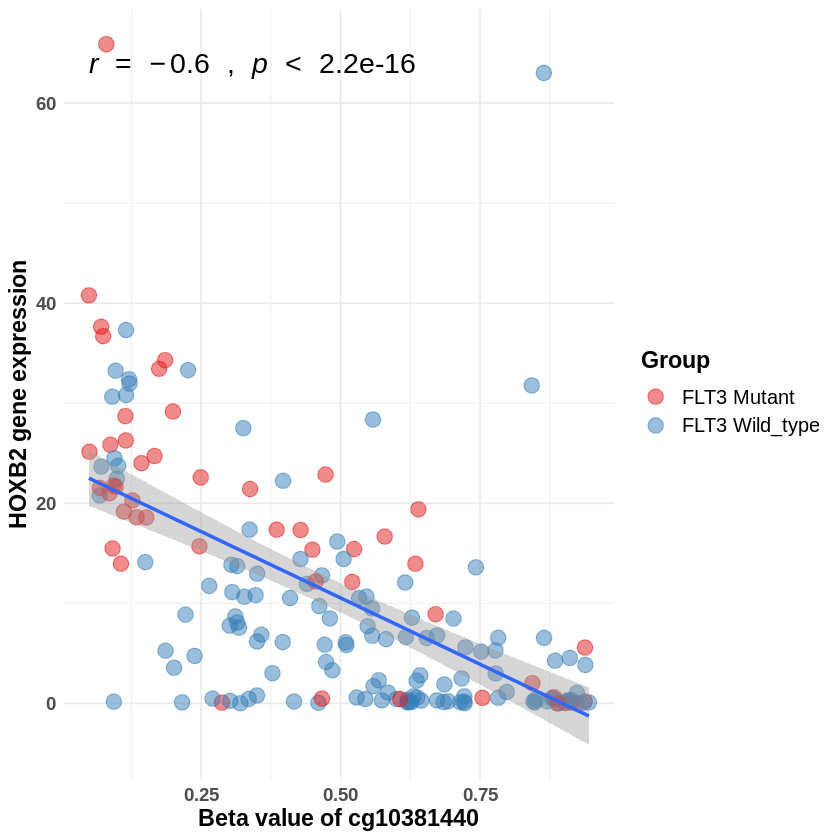

`geom_smooth()` using formula = 'y ~ x'


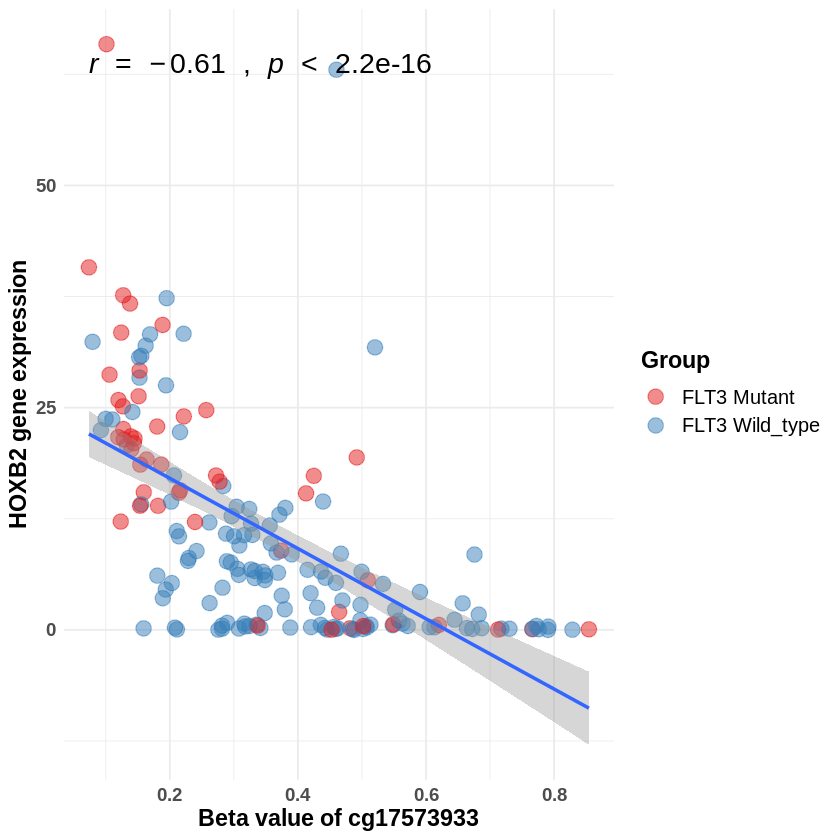

`geom_smooth()` using formula = 'y ~ x'


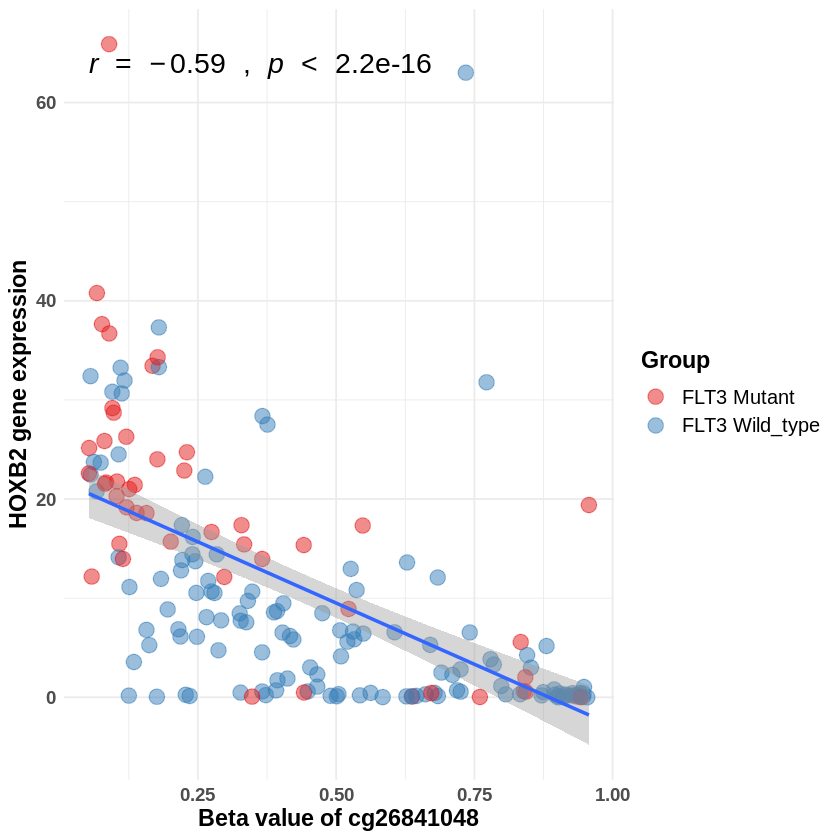

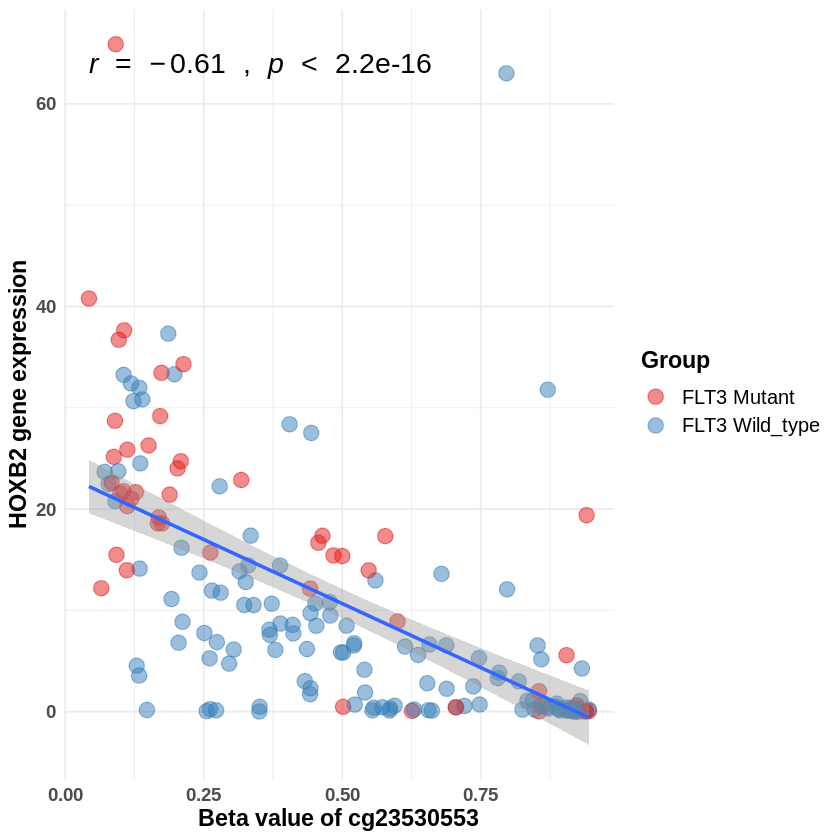

In [52]:
# Specify the gene ID
geneid <- "HOXB2"

# Subset RNA-seq data for the specified gene
dat <- subset(rna2, geneID %in% geneid)
dat1 <- melt(dat, id.vars = "geneID")

# Get the list of probe IDs for the gene of interest
vec1 <- subset(DMP.deg.sig, gene %in% geneid)$probeID

# Initialize a list to store ggplot objects
plot_list <- list()

# Iterate over each probe and create scatter plot with linear regression line
for (probe in vec1) {
  dat2 <- subset(bVals2, probeID %in% probe)
  dat3 <- melt(dat2, id.vars = "probeID")
  dat4 <- merge(dat1, dat3, by.x = "variable", by.y = "variable")
  data <- merge(dat4, designTSV, by.x = "variable", by.y = "Title")

  p <- ggplot(data, aes(x = value.y, y = value.x)) +
    geom_point(aes(color = Group), size = 4, alpha = 0.5) +
    labs(y = paste0(geneid, " gene expression"), x = paste0("Beta value of ", probe)) +
    theme_minimal() +
    theme(
      text = element_text(size = 14),
      legend.text = element_text(size = 12),
      legend.title = element_text(face = "bold"),
      axis.text = element_text(face = "bold"),
      axis.title = element_text(face = "bold")
    ) +
    scale_colour_brewer(palette = "Set1") +
    guides(size = FALSE) +
    geom_smooth(method = "lm") +
    stat_cor(aes(label = paste(tolower(..r.label..), ..p.label.., sep = "~`,`~")), size = 6)

  # Print the scatter plot
  print(p)
}